## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel: 


<img src="https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg" alt="Alternative text" />

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.



In [1]:
# importing required packages
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the required data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Cleaning

In [3]:
#checking shape od dataset i.e. total rows and cols
df.shape

(9240, 37)

In [4]:
#checking the cols properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# check for duplicates
sum(df.duplicated())

0

In [6]:
# get the numeric values details
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Replace all the string into the lower case, as it will make easy for convert 'Select' or 'select' to make null
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
# Replacing all the 'select' with NaN
df = df.replace('select',np.nan)

In [9]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
df['Receive More Updates About Our Courses'].value_counts()

no    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [11]:
# dropping all the cols which having unique columns values i.e. Near Zero variance
df= df.drop(['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1)


In [12]:
df.shape

(9240, 32)

In [13]:
# check the missing values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [14]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
# remove all the cols which having missing value >= 45%
cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [16]:
df.shape

(9240, 25)

In [17]:
# once again check the missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Following columns having very high number of missing values, so need to replace the missing value with 'not given'
- Country                                          26.63%
- Specialization                                   36.58%
- What is your current occupation                  29.11%
- What matters most to you in choosing a course    29.32%
- Tags                                             36.29%
- City                                             39.71%

In [19]:

df['Country'] = df['Country'].fillna('not given')
df['Specialization'] = df['Specialization'].fillna('not given') 
df['What is your current occupation'] = df['What is your current occupation'].fillna('not given')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not given')
df['Tags'] = df['Tags'].fillna('not given')
df['City'] = df['City'].fillna('not given')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
# once again check the missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [22]:
# fixing the missing values for Lead Source column
df['Lead Source'].value_counts(dropna=False)

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
youtubechannel          1
testone                 1
pay per click ads       1
welearnblog_home        1
welearn                 1
blog                    1
nc_edm                  1
Name: Lead Source, dtype: int64

In [23]:
# the most frequent value is 'google' so replace null values with 'google'
df['Lead Source'] = df['Lead Source'].replace(np.nan,'google')

In [24]:
# create low frequency values count to Others category
df['Lead Source'] = df['Lead Source'].replace(['welingak website', 'referral sites', 'facebook', 'bing', 'click2call',
                      'social media', 'live chat', 'press_release', 'pay per click ads', 'blog', 'welearn',
                      'welearnblog_home', 'youtubechannel', 'testone', 'nc_edm'] ,'Others')

In [25]:
# fixing the missing values for Last Activity column
df['Last Activity'].value_counts(dropna=False)

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
NaN                              103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [26]:
# the most frequent value is 'email opened' so replace null values with 'email opened'
df['Last Activity'] = df['Last Activity'].replace(np.nan,'email opened')

In [27]:
# create low frequency values count to Others category
df['Last Activity'] = df['Last Activity'].replace(['had a phone conversation', 'approached upfront', 
                      'view in browser link clicked', 'email received', 'email marked spam', 
                      'visited booth in tradeshow', 'resubscribed to emails'] ,'Others')

In [28]:
df['Last Activity'].value_counts(dropna=False)

email opened                 3540
sms sent                     2745
olark chat conversation       973
page visited on website       640
converted to lead             428
email bounced                 326
email link clicked            267
form submitted on website     116
unreachable                    93
unsubscribed                   61
Others                         51
Name: Last Activity, dtype: int64

### imputing numerical variable

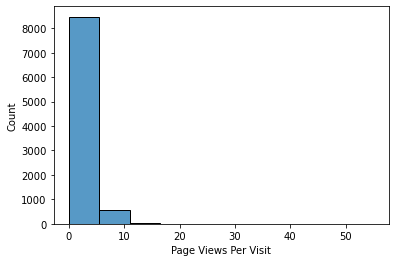

In [29]:
# plot this histogram to find data skewness
sns.histplot(data=df, x="Page Views Per Visit", bins=10)
plt.show()

In [30]:
# as this data having right skewed, so will use median for replace the missing values
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)

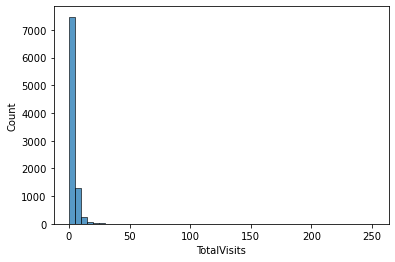

In [31]:
sns.histplot(data=df, x="TotalVisits", bins=50)
plt.show()

In [32]:
# as this data having right skewed, so will use median for replace the missing values
df['TotalVisits'].fillna(df['TotalVisits'].median(),inplace=True)

In [33]:
# once again check the missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

**** As all the mising value are treted now need to proceed with the EDA

### EDA

#### Univariate Analysis

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

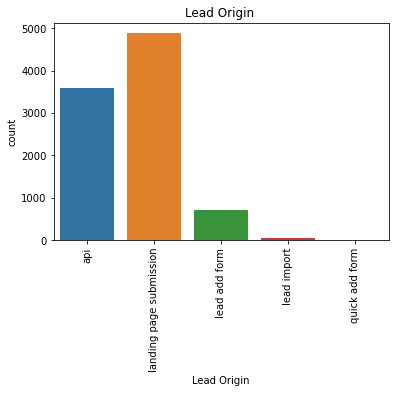

In [35]:
# plot the value for specific column using countplot
sns.countplot(df['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin ')
plt.show();

In [36]:
# create low frequency values count to Others category
df['Lead Origin'] = df['Lead Origin'].replace(['lead add form', 'lead import', 'quick add form'] ,'others')

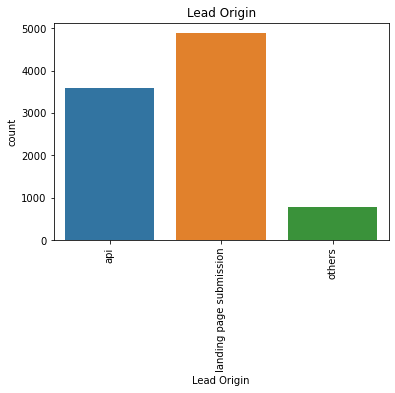

In [37]:
sns.countplot(df['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.show();

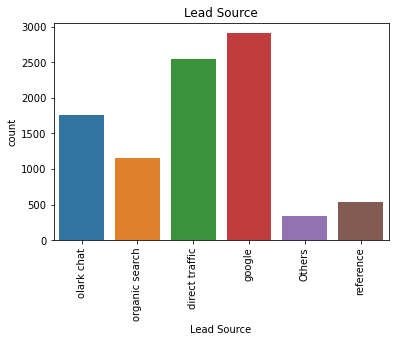

In [38]:
# plot the value for specific column using countplot
sns.countplot(df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show();

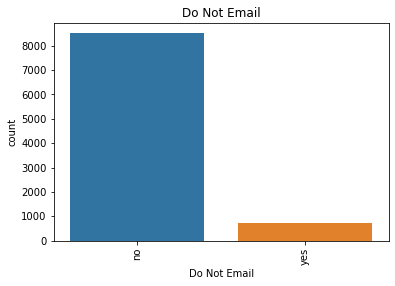

In [39]:
# plot the value for specific column using countplot
sns.countplot(df['Do Not Email']).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')
plt.show();

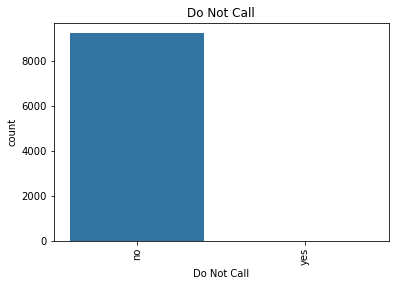

In [40]:
# plot the value for specific column using countplot
sns.countplot(df['Do Not Call']).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show();

In [41]:
df['Do Not Call'].value_counts()

no     9238
yes       2
Name: Do Not Call, dtype: int64

In [42]:
# drop 'Do Not Call' column as its having no most of the values
df.drop(['Do Not Call'], axis = 1, inplace=True)

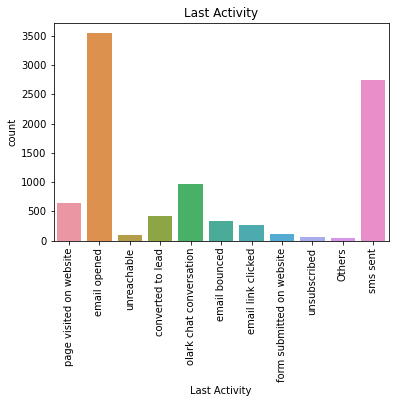

In [43]:
# plot the value for specific column using countplot
sns.countplot(df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show();

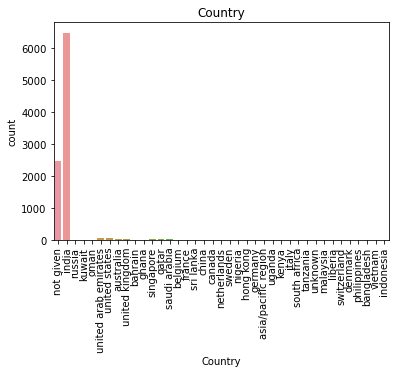

In [44]:
# plot the value for specific column using countplot
sns.countplot(df['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show();

In [45]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not given":
        category = "not given"
    else:
        category = "other than india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

india               6492
not given           2461
other than india     287
Name: Country, dtype: int64

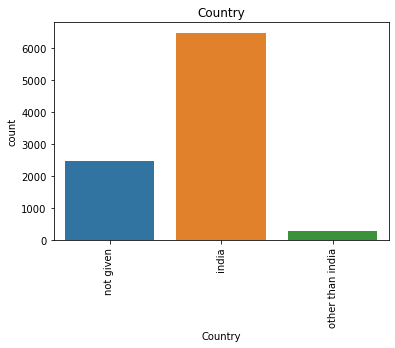

In [46]:
sns.countplot(df['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show();

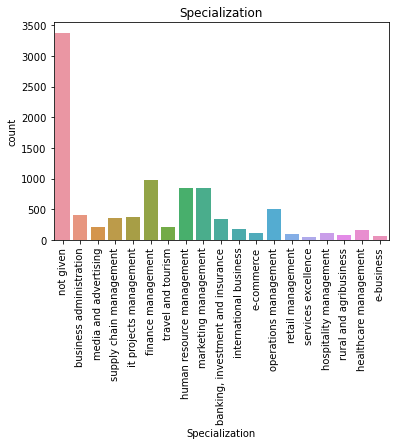

In [47]:
# plot the value for specific column using countplot
sns.countplot(df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show();

In [48]:
df['Specialization'].value_counts()

not given                            3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

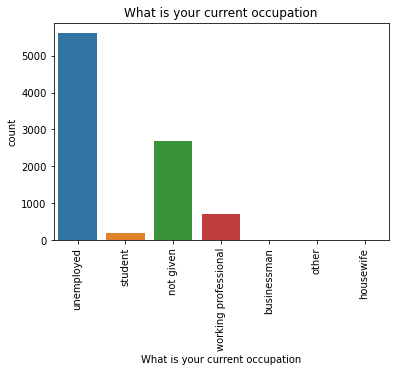

In [49]:
# plot the value for specific column using countplot
sns.countplot(df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show();

In [50]:
df['What is your current occupation'].value_counts()

unemployed              5600
not given               2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

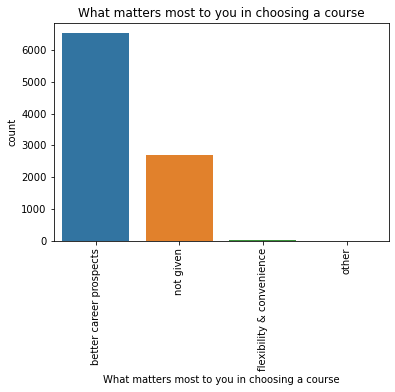

In [51]:
# plot the value for specific column using countplot
sns.countplot(df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.show();

In [52]:
df['What matters most to you in choosing a course'].value_counts()

better career prospects      6528
not given                    2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

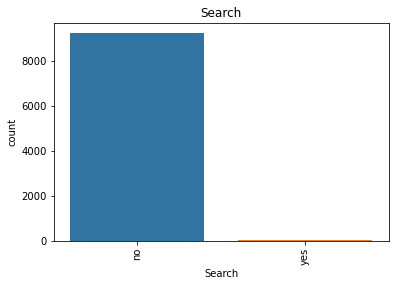

In [53]:
# plot the value for specific column using countplot
sns.countplot(df['Search']).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show();

In [54]:
df['Search'].value_counts()

no     9226
yes      14
Name: Search, dtype: int64

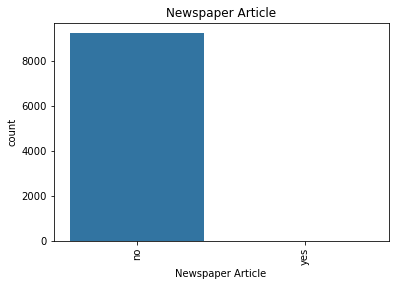

In [55]:
# plot the value for specific column using countplot
sns.countplot(df['Newspaper Article']).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')
plt.show();

In [56]:
df['Newspaper Article'].value_counts()

no     9238
yes       2
Name: Newspaper Article, dtype: int64

In [57]:
# drop 'Newspaper Article' column as its having no most of the values
df.drop(['Newspaper Article'], axis = 1, inplace=True)

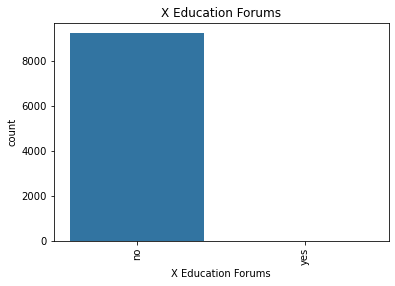

In [58]:
# plot the value for specific column using countplot
sns.countplot(df['X Education Forums']).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show();

In [59]:
df['X Education Forums'].value_counts()

no     9239
yes       1
Name: X Education Forums, dtype: int64

In [60]:
# drop 'Newspaper Article' column as its having no most of the values
df.drop(['X Education Forums'], axis = 1, inplace=True)

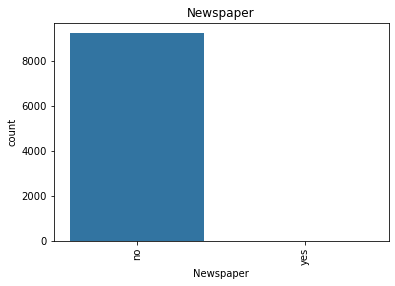

In [61]:
# plot the value for specific column using countplot
sns.countplot(df['Newspaper']).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')
plt.show();

In [62]:
df['Newspaper'].value_counts()

no     9239
yes       1
Name: Newspaper, dtype: int64

In [63]:
# drop 'Newspaper' column as its having no most of the values
df.drop(['Newspaper'], axis = 1, inplace=True)

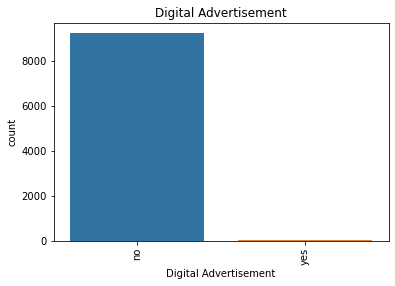

In [64]:
# plot the value for specific column using countplot
sns.countplot(df['Digital Advertisement']).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show();

In [65]:
df['Digital Advertisement'].value_counts()

no     9236
yes       4
Name: Digital Advertisement, dtype: int64

In [66]:
# drop 'Digital Advertisement' column as its having no most of the values
df.drop(['Digital Advertisement'], axis = 1, inplace=True)

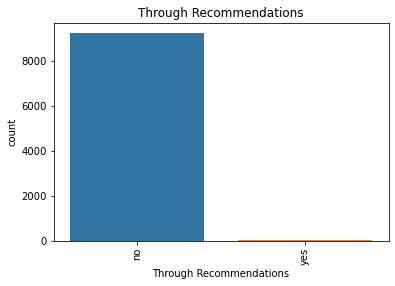

In [67]:
# plot the value for specific column using countplot
sns.countplot(df['Through Recommendations']).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')
plt.show();

In [68]:
df['Through Recommendations'].value_counts()

no     9233
yes       7
Name: Through Recommendations, dtype: int64

In [69]:
# drop 'Through Recommendations' column as its having no most of the values
df.drop(['Through Recommendations'], axis = 1, inplace=True)

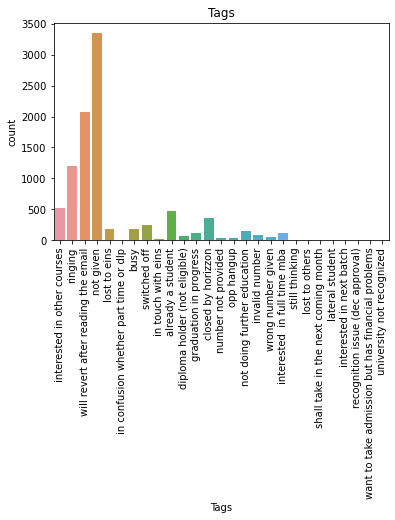

In [70]:
# plot the value for specific column using countplot
sns.countplot(df['Tags']).tick_params(axis='x', rotation = 90)
plt.title('Tags')
plt.show();

In [71]:
df['Tags'].value_counts()

not given                                            3353
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [72]:
# create low frequency values count to Others category
df['Tags'] = df['Tags'].replace(['invalid number', 'diploma holder (not eligible)', 'wrong number given',
                                'opp hangup', 'number not provided', 'in touch with eins', 'lost to others',
                                'still thinking','want to take admission but has financial problems',
                                'in confusion whether part time or dlp', 'interested in next batch', 'lateral student',
                                'shall take in the next coming month', 'university not recognized', 
                                'recognition issue (dec approval)'] ,'others')

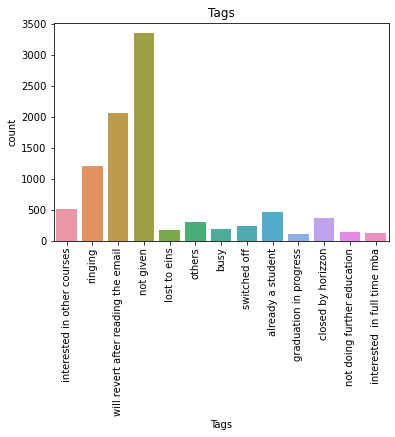

In [73]:
sns.countplot(df['Tags']).tick_params(axis='x', rotation = 90)
plt.title('Tags')
plt.show();

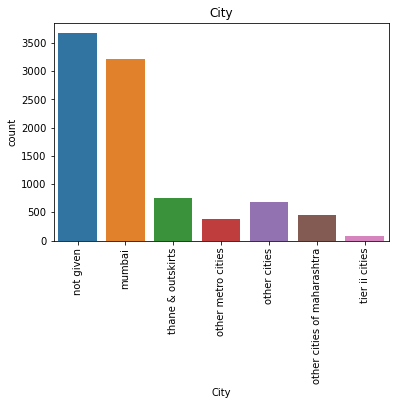

In [74]:
# plot the value for specific column using countplot
sns.countplot(df['City']).tick_params(axis='x', rotation = 90)
plt.title('City')
plt.show();

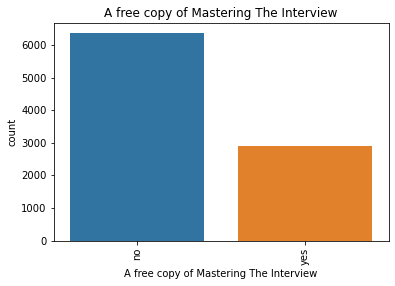

In [75]:
# plot the value for specific column using countplot
sns.countplot(df['A free copy of Mastering The Interview']).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show();

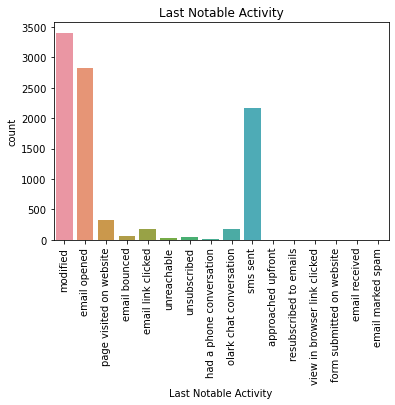

In [76]:
# plot the value for specific column using countplot
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show();

In [77]:
df['Last Notable Activity'].value_counts()

modified                        3407
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

In [78]:
 # create low frequency values count to Others category
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['page visited on website', 'olark chat conversation', 'email link clicked',
                                'email bounced', 'unsubscribed', 'unreachable', 'had a phone conversation',
                                'email marked spam', 'approached upfront', 'resubscribed to emails', 
                                'view in browser link clicked', 'form submitted on website',
                                'email received'] ,'others')

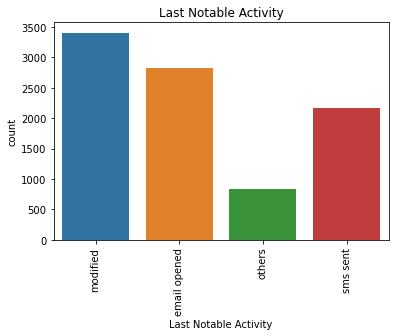

In [79]:
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show();

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

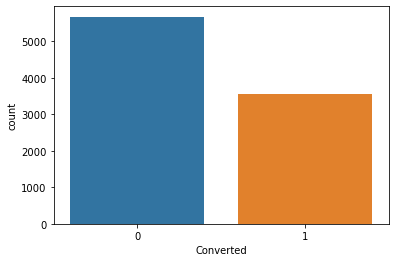

In [81]:
# now move to numerical variable
sns.countplot(df['Converted'])
plt.show()

In [82]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.53896103896104

#### The lead Conversion rate is 39% we have currently.

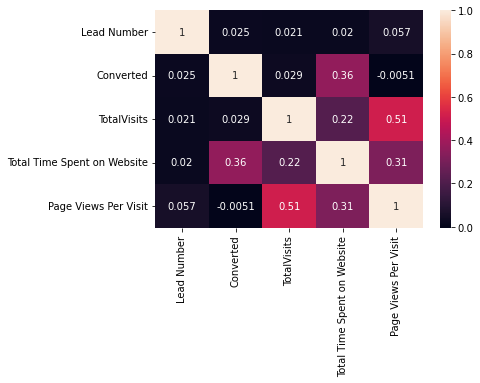

In [83]:
# correlations for the numeric variable
sns.heatmap(df.corr(), annot=True)
plt.show()

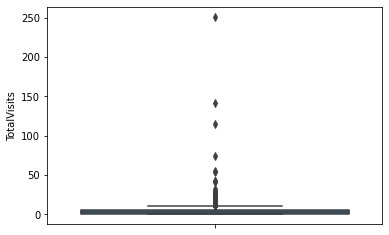

In [84]:
# looking into TotalVisits 
sns.boxplot(y=df['TotalVisits'])
plt.show();

#### Thare are outliers avaliable in the TotalVisits col

In [85]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [86]:
percentiles = df['TotalVisits'].quantile([0.01,0.99]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

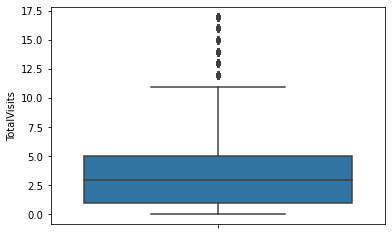

In [87]:
sns.boxplot(y=df['TotalVisits'])
plt.show();

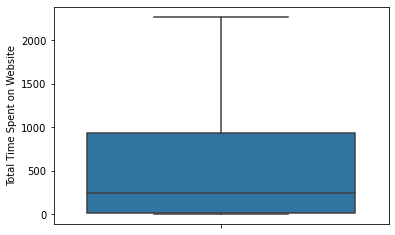

In [88]:
# looking into 'Total Time Spent on Website' 
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show();

#### There are no outliers for 'Total Time Spent on Website', hence no need to do any treatment for 'Total Time Spent on Website' col

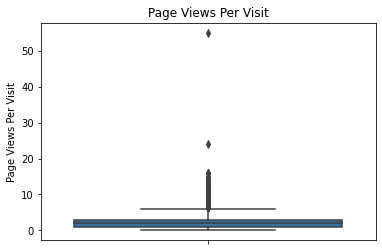

In [89]:
# looking into 'Page Views Per Visit'
sns.boxplot(y=df['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.show();

In [90]:
percentiles = df['Page Views Per Visit'].quantile([0.01,0.99]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

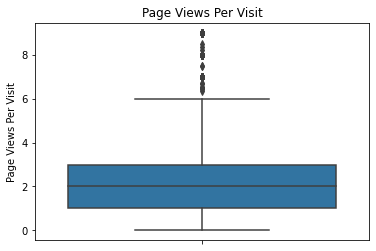

In [91]:
sns.boxplot(y=df['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.show();

In [92]:
# drop 'Prospect ID' and 'Lead Number' as there are all unique values
df1 =df.drop(['Prospect ID', 'Lead Number'], axis =1)

In [93]:
df1.shape

(9240, 17)

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

#### Bivariate & Multivariate Analysis

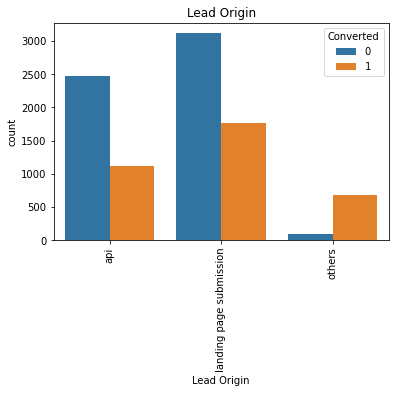

In [95]:
# Lead Origin vs Converted plot
sns.countplot(x='Lead Origin', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.show()

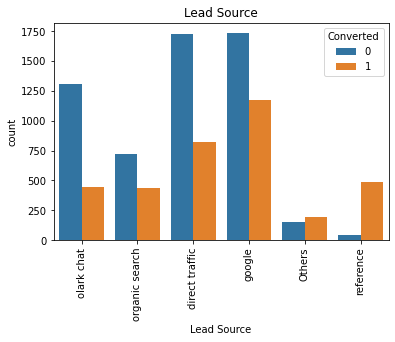

In [96]:
# Lead Source vs Converted plot
sns.countplot(x='Lead Source', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

#### We are able to see when lead comes from refrence, maximum lead is converted as Hot lead.

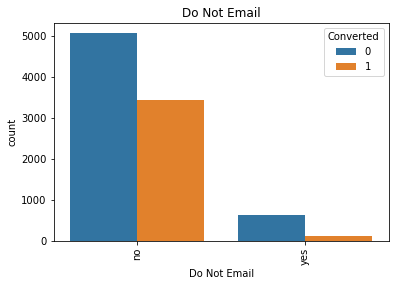

In [97]:
# Do Not Email vs Converted plot
sns.countplot(x='Do Not Email', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')
plt.show()

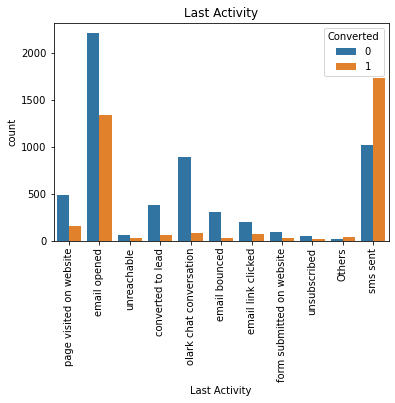

In [98]:
# Last Activity vs Converted plot
sns.countplot(x='Last Activity', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

#### We are able to see when Last Activity is sms Sent, maximum lead is converted as Hot lead.

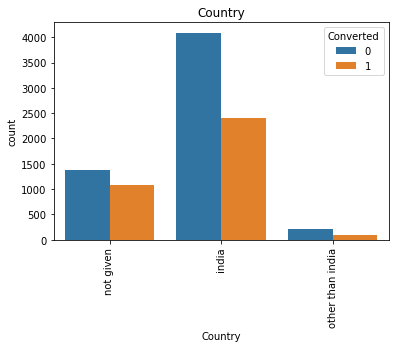

In [99]:
# Country vs Converted plot
sns.countplot(x='Country', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

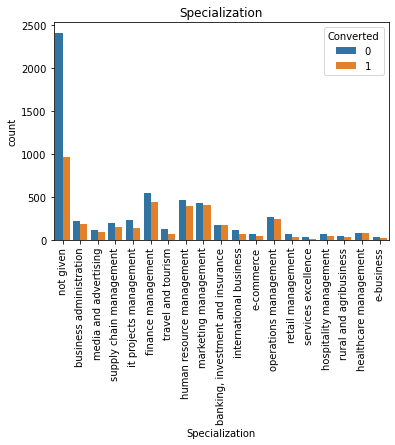

In [100]:
# Specialization vs Converted plot
sns.countplot(x='Specialization', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

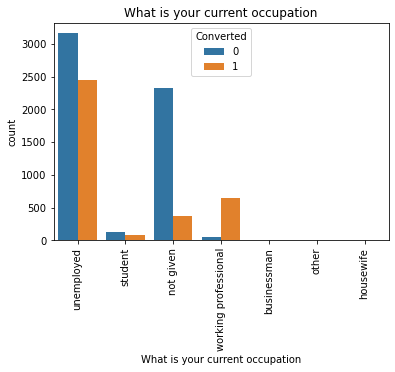

In [101]:
# What is your current occupation vs Converted plot
sns.countplot(x='What is your current occupation', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

#### We are able to see when occupation is working professional, maximum lead is converted as Hot lead.

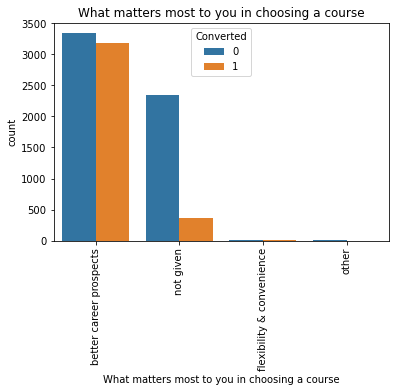

In [102]:
# What matters most to you in choosing a course vs Converted plot
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.show()

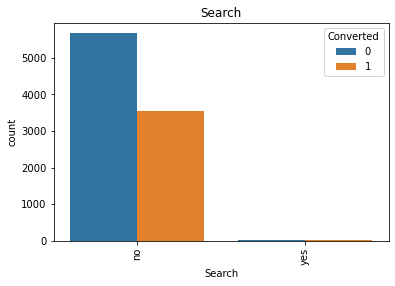

In [103]:
# Search vs Converted plot
sns.countplot(x='Search', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

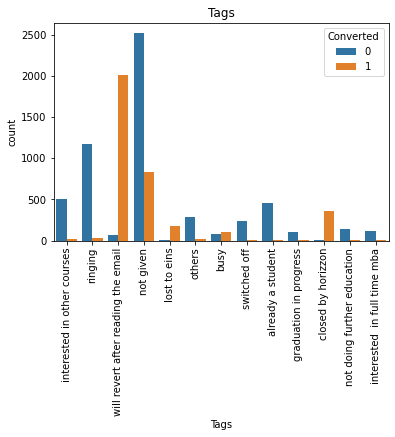

In [104]:
# Tags vs Converted plot
sns.countplot(x='Tags', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Tags')
plt.show()

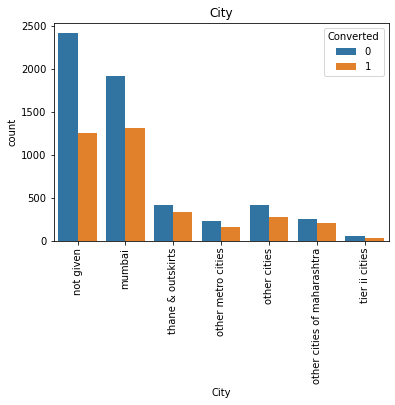

In [105]:
# City vs Converted plot
sns.countplot(x='City', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('City')
plt.show()

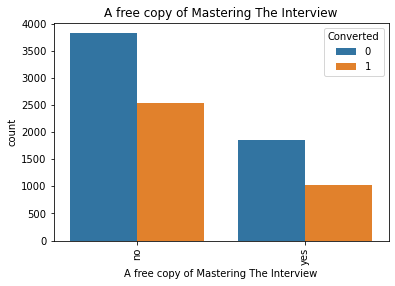

In [106]:
# A free copy of Mastering The Interview vs Converted plot
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

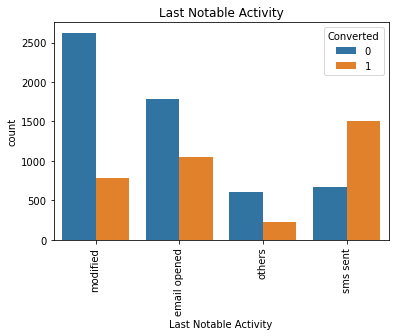

In [107]:
# Last Notable Activity vs Converted plot
sns.countplot(x='Last Notable Activity', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In [108]:
df1['Search'].value_counts()

no     9226
yes      14
Name: Search, dtype: int64

In [109]:
df1.drop(['Search'], axis=1, inplace=True)

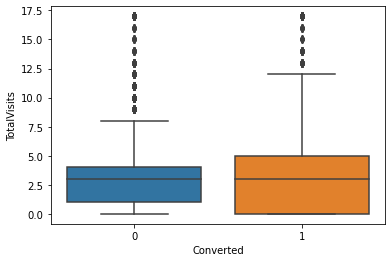

In [110]:
# TotalVisits vs Converted plot
sns.boxplot(y = 'TotalVisits', x = 'Converted', data =df1)
plt.show()

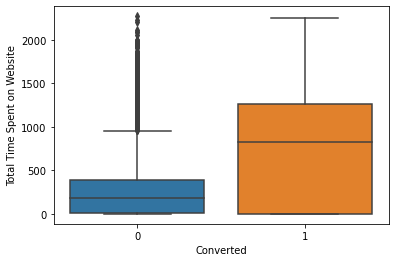

In [111]:
# Total Time Spent on Website vs Converted plot
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data =df1)
plt.show()

#### More the time spent into the website more Hot lead convetred and vice varsa

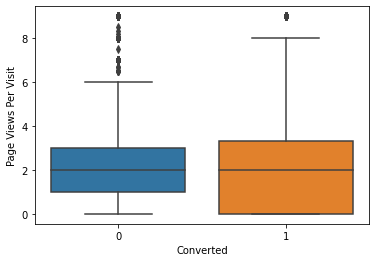

In [112]:
# Page Views Per Visit vs Converted plot
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df1)
plt.show()

#### Create Dummy Variable For Categorical Cols

In [113]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,0,0.0,0,0.0,page visited on website,not given,not given,unemployed,better career prospects,interested in other courses,not given,no,modified
1,api,organic search,no,0,5.0,674,2.5,email opened,india,not given,unemployed,better career prospects,ringing,not given,no,email opened
2,landing page submission,direct traffic,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,will revert after reading the email,mumbai,yes,email opened
3,landing page submission,direct traffic,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,ringing,mumbai,no,modified
4,landing page submission,google,no,1,2.0,1428,1.0,converted to lead,india,not given,unemployed,better career prospects,will revert after reading the email,mumbai,no,modified


In [114]:
# list of categorical columns
cat_cols= df1.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [115]:
cat_bin_list =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

In [116]:
df1[cat_bin_list] = df1[cat_bin_list].apply(binary_map)

In [117]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,not given,not given,unemployed,better career prospects,interested in other courses,not given,0,modified
1,api,organic search,0,0,5.0,674,2.5,email opened,india,not given,unemployed,better career prospects,ringing,not given,0,email opened
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,will revert after reading the email,mumbai,1,email opened
3,landing page submission,direct traffic,0,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,ringing,mumbai,0,modified
4,landing page submission,google,0,1,2.0,1428,1.0,converted to lead,india,not given,unemployed,better career prospects,will revert after reading the email,mumbai,0,modified


In [118]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
        'Last Notable Activity']], drop_first=True)

In [119]:
dummy1

,Lead Origin_landing page submission,Lead Origin_others,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,...,Tags_will revert after reading the email,City_not given,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Last Notable Activity_modified,Last Notable Activity_others,Last Notable Activity_sms sent
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9236,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9237,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9238,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [120]:

# Adding the results to the master dataframe
df_lead = pd.concat([df1, dummy1], axis=1)

In [121]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Tags_will revert after reading the email,City_not given,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Last Notable Activity_modified,Last Notable Activity_others,Last Notable Activity_sms sent
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,not given,not given,...,0,1,0,0,0,0,0,1,0,0
1,api,organic search,0,0,5.0,674,2.5,email opened,india,not given,...,0,1,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,india,business administration,...,1,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,0,0,1.0,305,1.0,unreachable,india,media and advertising,...,0,0,0,0,0,0,0,1,0,0
4,landing page submission,google,0,1,2.0,1428,1.0,converted to lead,india,not given,...,1,0,0,0,0,0,0,1,0,0


In [122]:
df_lead = df_lead.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
        'Last Notable Activity'], axis=1)

In [123]:
df_lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_others,Lead Source_direct traffic,Lead Source_google,...,Tags_will revert after reading the email,City_not given,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Last Notable Activity_modified,Last Notable Activity_others,Last Notable Activity_sms sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


#### Test-Train Split

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X = df_lead.drop(['Converted'], axis= 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_others,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,...,Tags_will revert after reading the email,City_not given,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Last Notable Activity_modified,Last Notable Activity_others,Last Notable Activity_sms sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [126]:
#target variable in y
y = df_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [127]:
# Splitting the data into train and test i.e 70% and 30% for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [128]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (6468, 72)
X_test: (2772, 72)
y_train: (6468,)
y_test: (2772,)


#### Feature Scaling

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()
X_train[['TotalVisits',	'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_others,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,...,Tags_will revert after reading the email,City_not given,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Last Notable Activity_modified,Last Notable Activity_others,Last Notable Activity_sms sent
1871,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6795,0,0.205373,0.005716,-0.503379,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3516,0,0.512365,-0.691418,0.092260,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8105,0,0.512365,1.365219,1.364995,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3934,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [131]:
# Let's see the correlation matrix 
plt.figure(figsize = (200,100))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

#### As we have lots of variables and use other approch to drop the cols

In [132]:
import statsmodels.api as sm

In [133]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

In [134]:
# using RFE get the 15 variables as outcome
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [135]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False, False])

In [136]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('A free copy of Mastering The Interview', False, 27),
 ('Lead Origin_landing page submission', False, 14),
 ('Lead Origin_others', True, 1),
 ('Lead Source_direct traffic', False, 33),
 ('Lead Source_google', False, 34),
 ('Lead Source_olark chat', False, 32),
 ('Lead Source_organic search', False, 35),
 ('Lead Source_reference', False, 20),
 ('Last Activity_converted to lead', False, 11),
 ('Last Activity_email bounced', False, 6),
 ('Last Activity_email link clicked', False, 16),
 ('Last Activity_email opened', False, 56),
 ('Last Activity_form submitted on website', False, 55),
 ('Last Activity_olark chat conversation', False, 5),
 ('Last Activity_page visited on website', False, 15),
 ('Last Activity_sms sent', True, 1),
 ('Last Activity_unreachable', False, 29),
 ('Last Activity_unsubscribed', False, 22),
 ('Country_not given', False, 3),
 ('C

In [137]:
#list all 15 of RFE supported columns
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_others',
       'Last Activity_sms sent', 'Specialization_travel and tourism',
       'What matters most to you in choosing a course_not given', 'Tags_busy',
       'Tags_closed by horizzon', 'Tags_lost to eins',
       'Tags_not doing further education', 'Tags_not given', 'Tags_ringing',
       'Tags_switched off', 'Tags_will revert after reading the email',
       'Last Notable Activity_modified'],
      dtype='object')

In [138]:
# Selecting all the 15 columns by RFE
X_train = X_train[cols]
X_train.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_others,Last Activity_sms sent,Specialization_travel and tourism,What matters most to you in choosing a course_not given,Tags_busy,Tags_closed by horizzon,Tags_lost to eins,Tags_not doing further education,Tags_not given,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,Last Notable Activity_modified
1871,0,-0.885371,0,0,0,0,0,0,0,0,0,1,0,0,0
6795,0,0.005716,0,0,0,0,0,0,0,0,1,0,0,0,0
3516,0,-0.691418,0,0,0,0,0,0,0,0,0,1,0,0,0
8105,0,1.365219,0,1,0,0,0,0,0,0,0,1,0,0,0
3934,0,-0.885371,0,0,0,0,0,0,0,0,1,0,0,0,1


In [139]:
# model1
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1163.1
Date:                Mon, 17 Oct 2022   Deviance:                       2326.3
Time:                        23:25:27   Pearson chi2:                 1.19e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -3.2885      0.192    -17.156      0.000      -3.664      -2.913
Do Not Email                                               -0.9203      0.241     -3.813      0.000      -1.393      -0.447
Total Time Spent on Website                                 0.8577      0.056     15.408      0.000       0.749       0.967
Lead Origin_others                                          1.1708      0.254      4.604      0.000       0.672       1.669
Last Activity_sms sent                                      2.1370      0.125     17.120      0.000       1.892       2.382
Specialization_travel and tourism                          -1.1372      0.432     -2.632      0.008      -1.984      -0.290
What matters most to you in choosing a course_not given    -2.7940      0.157    -17.778      0.000      -3.102      -2.486
Tags_busy                                                   2.1447      0.285      7.518      0.000       1.586       2.704
Tags_closed by horizzon                                     9.1167      1.031      8.844      0.000       7.096      11.137
Tags_lost to eins                                           9.6420      0.788     12.232      0.000       8.097      11.187
Tags_not doing further education                           -0.9016      1.034     -0.872      0.383      -2.928       1.125
Tags_not given                                              3.9697      0.225     17.649      0.000       3.529       4.411
Tags_ringing                                               -1.6284      0.287     -5.680      0.000      -2.190      -1.067
Tags_switched off                                          -1.7595      0.553     -3.181      0.001      -2.844      -0.675
Tags_will revert after reading the email                    6.2973      0.250     25.201      0.000       5.808       6.787
Last Notable Activity_modified                             -1.4158      0.127    -11.112      0.000      -1.666      -1.166
===========================================================================================================================
"""

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_not given,4.78
5,What matters most to you in choosing a course_...,4.60
3,Last Activity_sms sent,1.64
13,Tags_will revert after reading the email,1.54
14,Last Notable Activity_modified,1.51
2,Lead Origin_others,1.46
7,Tags_closed by horizzon,1.28
1,Total Time Spent on Website,1.20
0,Do Not Email,1.13
11,Tags_ringing,1.12


In [142]:
#dropping variable with hight p value of 'Tags_not doing further education'	38.3%
cols = cols.drop('Tags_not doing further education',1)

In [143]:
# model2
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1163.6
Date:                Mon, 17 Oct 2022   Deviance:                       2327.3
Time:                        23:28:42   Pearson chi2:                 1.19e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -3.3306      0.189    -17.669      0.000      -3.700      -2.961
Do Not Email                                               -0.9303      0.241     -3.866      0.000      -1.402      -0.459
Total Time Spent on Website                                 0.8579      0.056     15.409      0.000       0.749       0.967
Lead Origin_others                                          1.1735      0.255      4.610      0.000       0.675       1.672
Last Activity_sms sent                                      2.1404      0.125     17.148      0.000       1.896       2.385
Specialization_travel and tourism                          -1.1371      0.432     -2.630      0.009      -1.985      -0.290
What matters most to you in choosing a course_not given    -2.7951      0.157    -17.776      0.000      -3.103      -2.487
Tags_busy                                                   2.1855      0.283      7.714      0.000       1.630       2.741
Tags_closed by horizzon                                     9.1596      1.030      8.891      0.000       7.140      11.179
Tags_lost to eins                                           9.6873      0.787     12.302      0.000       8.144      11.231
Tags_not given                                              4.0124      0.222     18.061      0.000       3.577       4.448
Tags_ringing                                               -1.5890      0.285     -5.578      0.000      -2.147      -1.031
Tags_switched off                                          -1.7197      0.552     -3.114      0.002      -2.802      -0.637
Tags_will revert after reading the email                    6.3402      0.247     25.630      0.000       5.855       6.825
Last Notable Activity_modified                             -1.4180      0.127    -11.132      0.000      -1.668      -1.168
===========================================================================================================================
"""

In [144]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_not given,4.78
5,What matters most to you in choosing a course_...,4.59
3,Last Activity_sms sent,1.64
12,Tags_will revert after reading the email,1.54
13,Last Notable Activity_modified,1.48
2,Lead Origin_others,1.46
7,Tags_closed by horizzon,1.27
1,Total Time Spent on Website,1.20
10,Tags_ringing,1.12
0,Do Not Email,1.11


In [145]:
#dropping variable with high VIF
cols = cols.drop('Tags_not given',1)

In [146]:
# model3
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1401.9
Date:                Mon, 17 Oct 2022   Deviance:                       2803.7
Time:                        23:30:27   Pearson chi2:                 1.22e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -1.2551      0.088    -14.303      0.000      -1.427      -1.083
Do Not Email                                               -0.9601      0.219     -4.394      0.000      -1.388      -0.532
Total Time Spent on Website                                 0.7918      0.049     16.078      0.000       0.695       0.888
Lead Origin_others                                          2.1934      0.227      9.678      0.000       1.749       2.638
Last Activity_sms sent                                      2.1939      0.110     19.888      0.000       1.978       2.410
Specialization_travel and tourism                          -1.1568      0.390     -2.965      0.003      -1.921      -0.392
What matters most to you in choosing a course_not given    -0.8210      0.115     -7.136      0.000      -1.046      -0.596
Tags_busy                                                   0.1271      0.234      0.542      0.588      -0.332       0.587
Tags_closed by horizzon                                     6.9578      1.014      6.864      0.000       4.971       8.944
Tags_lost to eins                                           6.4066      0.734      8.723      0.000       4.967       7.846
Tags_ringing                                               -3.7387      0.237    -15.781      0.000      -4.203      -3.274
Tags_switched off                                          -3.8195      0.528     -7.236      0.000      -4.854      -2.785
Tags_will revert after reading the email                    4.2969      0.184     23.403      0.000       3.937       4.657
Last Notable Activity_modified                             -1.6626      0.117    -14.235      0.000      -1.891      -1.434
===========================================================================================================================
"""

In [147]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Last Activity_sms sent,1.54
11,Tags_will revert after reading the email,1.49
12,Last Notable Activity_modified,1.47
2,Lead Origin_others,1.42
5,What matters most to you in choosing a course_...,1.36
7,Tags_closed by horizzon,1.26
1,Total Time Spent on Website,1.19
0,Do Not Email,1.11
9,Tags_ringing,1.11
6,Tags_busy,1.04


In [148]:
#dropping variable with high p value for 'Tags_busy' 58.8%
cols = cols.drop('Tags_busy',1)

In [149]:
# model4
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1402.0
Date:                Mon, 17 Oct 2022   Deviance:                       2804.0
Time:                        23:32:50   Pearson chi2:                 1.23e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -1.2434      0.085    -14.638      0.000      -1.410      -1.077
Do Not Email                                               -0.9643      0.218     -4.415      0.000      -1.392      -0.536
Total Time Spent on Website                                 0.7926      0.049     16.104      0.000       0.696       0.889
Lead Origin_others                                          2.1849      0.226      9.654      0.000       1.741       2.628
Last Activity_sms sent                                      2.2037      0.109     20.233      0.000       1.990       2.417
Specialization_travel and tourism                          -1.1646      0.390     -2.989      0.003      -1.928      -0.401
What matters most to you in choosing a course_not given    -0.8361      0.112     -7.486      0.000      -1.055      -0.617
Tags_closed by horizzon                                     6.9507      1.014      6.858      0.000       4.964       8.937
Tags_lost to eins                                           6.4053      0.735      8.720      0.000       4.965       7.845
Tags_ringing                                               -3.7579      0.234    -16.034      0.000      -4.217      -3.299
Tags_switched off                                          -3.8393      0.527     -7.290      0.000      -4.872      -2.807
Tags_will revert after reading the email                    4.2868      0.183     23.469      0.000       3.929       4.645
Last Notable Activity_modified                             -1.6657      0.117    -14.281      0.000      -1.894      -1.437
===========================================================================================================================
"""

In [150]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Last Activity_sms sent,1.49
10,Tags_will revert after reading the email,1.48
11,Last Notable Activity_modified,1.46
2,Lead Origin_others,1.42
5,What matters most to you in choosing a course_...,1.36
6,Tags_closed by horizzon,1.26
1,Total Time Spent on Website,1.19
0,Do Not Email,1.11
8,Tags_ringing,1.11
7,Tags_lost to eins,1.04


#### Prediction For Training Data

In [151]:
y_train_pred = res4.predict(X_train_sm)
y_train_pred[:10]

1871    0.003325
6795    0.224628
3516    0.003875
8105    0.152446
3934    0.026318
4844    0.998799
3297    0.003759
8071    0.997575
987     0.036795
7423    0.998901
dtype: float64

In [152]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00332455, 0.22462825, 0.00387486, 0.15244577, 0.02631789,
       0.99879925, 0.00375906, 0.99757457, 0.03679466, 0.9989008 ])

In [153]:
y_train_pred_res = pd.DataFrame({'y_train.values':y_train.values, 'y_train_pred':y_train_pred})
y_train_pred_res.head()

,y_train.values,y_train_pred
0,0,0.003325
1,0,0.224628
2,0,0.003875
3,0,0.152446
4,0,0.026318


In [154]:
y_train_pred_res['Predicted'] = y_train_pred_res['y_train_pred'].map(lambda x: 1 if x > 0.5 else 0)

In [155]:
y_train_pred_res.head()

,y_train.values,y_train_pred,Predicted
0,0,0.003325,0
1,0,0.224628,0
2,0,0.003875,0
3,0,0.152446,0
4,0,0.026318,0


#### Model Evaluation for training Data

In [156]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_res['y_train.values'], y_train_pred_res.Predicted)
print(confusion)

[[3812  190]
 [ 340 2126]]


In [157]:
print(metrics.accuracy_score(y_train_pred_res['y_train.values'], y_train_pred_res.Predicted))

0.9180581323438466


In [158]:
# true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [159]:
# Calculating the sensitivity
TP/(TP+FN)

0.862124898621249

In [160]:
# Calculating the specificity
TN/(TN+FP)

0.9525237381309345

#### Find The Optimise  Cut-off Value

In [162]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [163]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_res['y_train.values'], y_train_pred_res.Predicted, drop_intermediate = False )

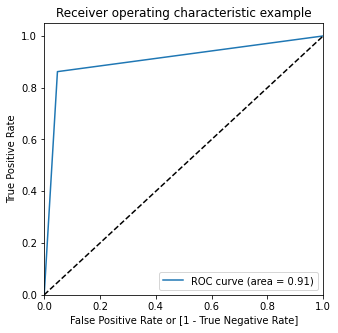

In [164]:
draw_roc(y_train_pred_res['y_train.values'], y_train_pred_res.Predicted)

In [165]:
# Creating probability cutoffs for different range
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_res[i]= y_train_pred_res.y_train_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_res.head()

,y_train.values,y_train_pred,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003325,0,1,0,0,0,0,0,0,0,0,0
1,0,0.224628,0,1,1,1,0,0,0,0,0,0,0
2,0,0.003875,0,1,0,0,0,0,0,0,0,0,0
3,0,0.152446,0,1,1,0,0,0,0,0,0,0,0
4,0,0.026318,0,1,0,0,0,0,0,0,0,0,0


In [166]:
# Accuracy for different cut off values
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_res['y_train.values'], y_train_pred_res[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.817409,0.968370,0.724388
0.2,0.2,0.892084,0.926602,0.870815
0.3,0.3,0.915121,0.909976,0.918291
0.4,0.4,0.916821,0.879968,0.939530
0.5,0.5,0.918058,0.862125,0.952524
0.6,0.6,0.912028,0.820762,0.968266
0.7,0.7,0.908472,0.789943,0.981509
0.8,0.8,0.899660,0.759124,0.986257
0.9,0.9,0.884045,0.712084,0.990005


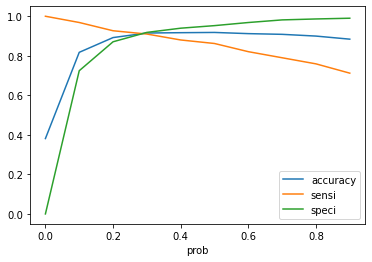

In [167]:
# Find the cut-off poins
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [171]:
y_train_pred_res['predicted_res'] = y_train_pred_res.y_train_pred.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_res.head()

,y_train.values,y_train_pred,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_res
0,0,0.003325,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.224628,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.003875,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.152446,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.026318,0,1,0,0,0,0,0,0,0,0,0,0


In [180]:
y_train_pred_res['Lead_Score'] = y_train_pred_res.y_train_pred.map( lambda x: round(x*100))
y_train_pred_res.head()

,y_train.values,y_train_pred,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_res,Lead_Score
0,0,0.003325,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.224628,0,1,1,1,0,0,0,0,0,0,0,0,22
2,0,0.003875,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.152446,0,1,1,0,0,0,0,0,0,0,0,0,15
4,0,0.026318,0,1,0,0,0,0,0,0,0,0,0,0,3


In [172]:
# accuracy for training dataset accuracy
metrics.accuracy_score(y_train_pred_res['y_train.values'], y_train_pred_res.predicted_res)

0.9151205936920223

In [173]:
# Creating confusion matrix 
confusion_res= metrics.confusion_matrix(y_train_pred_res['y_train.values'], y_train_pred_res.predicted_res)
confusion_res

array([[3675,  327],
       [ 222, 2244]], dtype=int64)

In [188]:
# true positive
TP = confusion_res[1,1]
# true negatives
TN = confusion_res[0,0]
# false positives
FP = confusion_res[0,1] 
# false negatives
FN = confusion_res[1,0]

In [189]:
# sensitivity
TP/(TP+FN)

0.9099756690997567

In [190]:
# specificity
TN/(TN+FP)

0.9182908545727136

#### Testing Dataset Prediction

In [177]:
# apply scaling to test data of numeric cols
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [178]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_others,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,...,Tags_will revert after reading the email,City_not given,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Last Notable Activity_modified,Last Notable Activity_others,Last Notable Activity_sms sent
4269,0,1.433341,0.964504,2.892276,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2376,0,-1.022595,-0.885371,-1.180474,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
7766,0,0.512365,-0.777416,1.364995,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
9199,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4359,0,-1.022595,-0.885371,-1.180474,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [179]:
# adding constant to X_test dataset
X_test_sm = sm.add_constant(X_test[cols])
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_others,Last Activity_sms sent,Specialization_travel and tourism,What matters most to you in choosing a course_not given,Tags_closed by horizzon,Tags_lost to eins,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,Last Notable Activity_modified
4269,1.0,0,0.964504,0,1,0,1,0,0,0,0,0,0
2376,1.0,0,-0.885371,1,1,0,0,0,0,0,0,1,0
7766,1.0,0,-0.777416,0,0,0,0,0,0,0,0,1,0
9199,1.0,0,-0.885371,0,0,0,0,0,0,0,0,0,1
4359,1.0,0,-0.885371,1,0,0,0,0,0,0,0,1,0


In [182]:
y_test_pred = res4.predict(X_test_sm)
y_test_pred[:10]

4269    0.708623
2376    0.998807
7766    0.918875
9199    0.026318
4359    0.989297
9186    0.995648
1631    0.978347
8963    0.938789
8007    0.018928
5324    0.991652
dtype: float64

In [183]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.70862323, 0.99880709, 0.91887454, 0.02631789, 0.98929681,
       0.99564846, 0.97834685, 0.93878878, 0.0189282 , 0.99165192])

In [184]:
y_test_pred_res = pd.DataFrame({'y_test_actual':y_test.values, 'y_test_pred':y_test_pred})
y_test_pred_res.head()

,y_test_actual,y_test_pred
0,1,0.708623
1,1,0.998807
2,1,0.918875
3,0,0.026318
4,1,0.989297


In [185]:
# prediction for cut off 0.3
y_test_pred_res['predicted'] = y_test_pred_res.y_test_pred.map(lambda x: 1 if x > 0.3 else 0)
y_test_pred_res

,y_test_actual,y_test_pred,predicted
0,1,0.708623,1
1,1,0.998807,1
2,1,0.918875,1
3,0,0.026318,0
4,1,0.989297,1
...,...,...,...
2767,0,0.086223,0
2768,1,0.920077,1
2769,0,0.125080,0
2770,0,0.014150,0


In [202]:
y_test_pred_res['predicted'].value_counts()


0    1593
1    1179
Name: predicted, dtype: int64

In [198]:
y_test_pred_res['Lead_Score'] = y_test_pred_res.y_test_pred.map( lambda x: round(x*100))
y_test_pred_res.head()

,y_test_actual,y_test_pred,predicted,Lead_Score
0,1,0.708623,1,71
1,1,0.998807,1,100
2,1,0.918875,1,92
3,0,0.026318,0,3
4,1,0.989297,1,99


In [187]:
# confusion matrix 
confusion_test = metrics.confusion_matrix(y_test_pred_res.y_test_actual, y_test_pred_res.predicted)
confusion_test

array([[1512,  165],
       [  81, 1014]], dtype=int64)

In [186]:
# accuracy
metrics.accuracy_score(y_test_pred_res.y_test_actual, y_test_pred_res.predicted)

0.9112554112554112

In [191]:
# true positive
TP = confusion_test[1,1]
# true negatives
TN = confusion_test[0,0]
# false positives
FP = confusion_test[0,1] 
# false negatives
FN = confusion_test[1,0]

In [192]:
# sensitivity
TP/(TP+FN)

0.9260273972602739

In [193]:
# specificity
TN/(TN+FP)

0.9016100178890877

In [196]:
# recall = TP / TP + FN
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.9260273972602739

In [197]:
# precision = TP / TP + FP
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.8600508905852418

##### Finally the model summary
##### Training DataSet
- confusion matrix = [[3812  190]
                      [ 340 2126]]
- accuracy = 91.8%
- sensitivity = 90.9%
- specificity = 91.8%
##### Test DataSet
- confusion matrix = [[1512,  165],
                      [  81, 1014]]
- accuracy = 91%
- sensitivity = 92.6%
- specificity = 90%
- recall = 92.6%
- precision = 86%